In [ ]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

In [ ]:
iris_data = sns.load_dataset('iris')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data = iris_data.iloc[:, 0:4]

# **DBSCAN Model**

In [ ]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)

In [ ]:
print(model)

DBSCAN(eps=0.8, min_samples=19)


# **Detect outliers**

In [ ]:
outliers = pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers[model.labels_ == -1])

Counter({np.int64(1): 94, np.int64(0): 50, np.int64(-1): 6})
     sepal_length  sepal_width  petal_length  petal_width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


# **Visualization**

In [ ]:
feature = data
labels = model.labels_

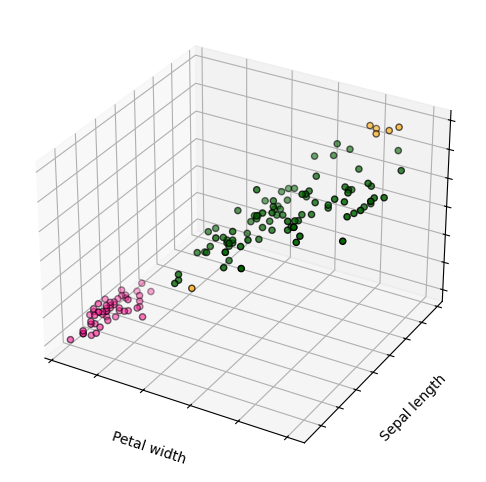

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

colors = ['deeppink', 'darkgreen', 'orange']
color_map = [colors[label] for label in labels]

fignum = 1
fig = plt.figure(fignum, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(feature.iloc[:, 3], feature.iloc[:, 0],
    feature.iloc[:, 2], c=color_map, edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

ax.dist = 12

plt.show()

In [ ]:
iris_data_labels = iris_data.species
dbscan_predicted_labels = model.labels_

adjusted_rand_score(iris_data_labels, dbscan_predicted_labels)

0.5560753044129076

# **Citing this Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main